In [1]:
import logging as log
import os
import os.path as path
import pickle
import subprocess
import sys
import time
from multiprocessing import Pool
from pathlib import Path
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle(path.join('..', 'data', 'feat_matrix.pkl'))
with open(path.join('..', 'data', 'features_x.txt'), 'rb') as f:
    features = pickle.load(f)

In [3]:
df.columns

Index(['AvgCustomersSchoolHoliday', 'DayOfWeek', 'Open', 'DayOfMonth', 'Type',
       'Customers', 'Outlier', 'HolidayNextWeek', 'LastDayCustomers',
       'AvgCustomersPromo', 'StateHoliday', 'AvgSales', 'Sales', 'AvgPromo',
       'AvgSchoolHoliday', 'Avg3MonthsCustomers', 'AvgCustomers',
       'LastDaySales', 'Year', 'IsSunday', 'Week', 'DayOfYear', 'Date',
       'SoonChristmas', 'DateInt', 'IsSaturday', 'WasChristmas', 'SalesLog',
       'AvgYearSales', 'Month', 'AvgYearCustomers', 'AvgWeekSales', 'Id',
       'Promo', 'HolidayLastWeek', 'AvgWeekCustomers', 'Avg3MonthsSales',
       'SchoolHoliday', 'Store', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSince', 'Promo2Weeks', 'Promo2',
       'PromoInterval', 'MonthsSincePromo2', 'SoonRefurbishments',
       'WasRefurbishments'],
      dtype='object')

In [4]:
df[df['MonthsSincePromo2'] == 0].shape[0]

556115

In [5]:
df[df['Outlier']].groupby(['Store'])['Sales'].count().sort_values(ascending=False).head(10)

Store
103     305
708     249
349     236
972     234
674     191
560     189
25      186
837     185
1081    185
105     182
Name: Sales, dtype: int64

In [6]:
df[df['Type'] == 'dropout'][['Outlier', 'Sales', 'SalesLog']].head()

,Outlier,Sales,SalesLog


In [7]:
df['Date'] = pd.to_datetime(df['DateInt'].apply(str))
df = df.set_index('Date')

In [8]:
train = pd.read_csv('../data/train.csv', low_memory=False)
train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index('Date').sort_index()
train[train['Sales'] == 0].shape

(172871, 8)

In [9]:
df[df['Month'] == 11]['Sales'].mean()

7097.371048780487

In [10]:
df[df['Month'] == 12]['Sales'].mean()

8201.87423288749

In [11]:
df[df['Month'] == 10]['Sales'].mean()

6609.139834775767

In [12]:
df[(df['Sales'] == 0) & (df['Type'] == 'train')]

,AvgCustomersSchoolHoliday,DayOfWeek,Open,DayOfMonth,Type,Customers,Outlier,HolidayNextWeek,LastDayCustomers,AvgCustomersPromo,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2Weeks,Promo2,PromoInterval,MonthsSincePromo2,SoonRefurbishments,WasRefurbishments
Date,,,,,,,,,,,,,,,,,,,,,


In [13]:
train[(train['Open'] == 1) & (train['Sales'] == 0)].shape[0]

54

In [14]:
train[train['Sales'] > 0]['Sales'].median()

6369.0

In [15]:
train[(train['Sales'] == 0) & (train.index < '2015-06-15')].count()

Store            166318
DayOfWeek        166318
Sales            166318
Customers        166318
Open             166318
Promo            166318
StateHoliday     166318
SchoolHoliday    166318
dtype: int64

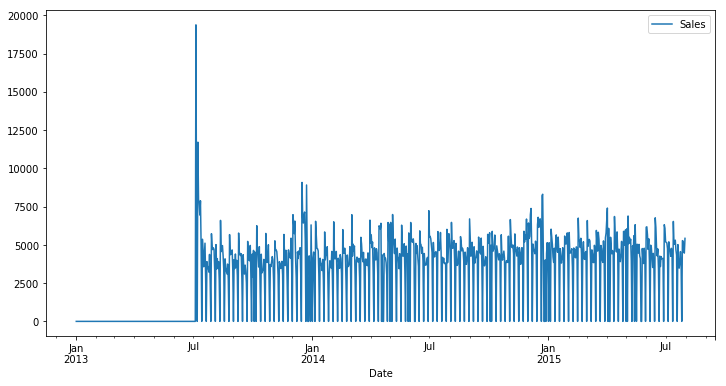

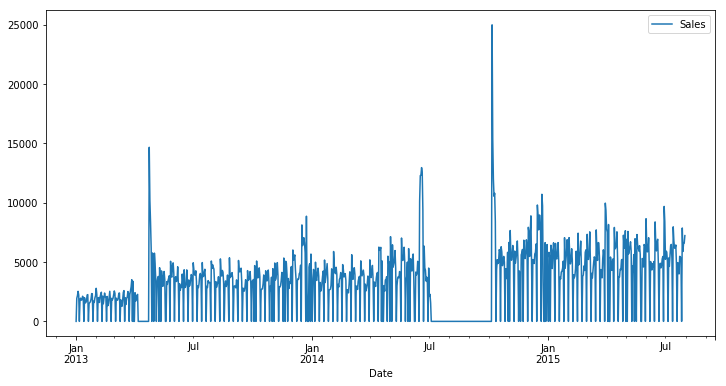

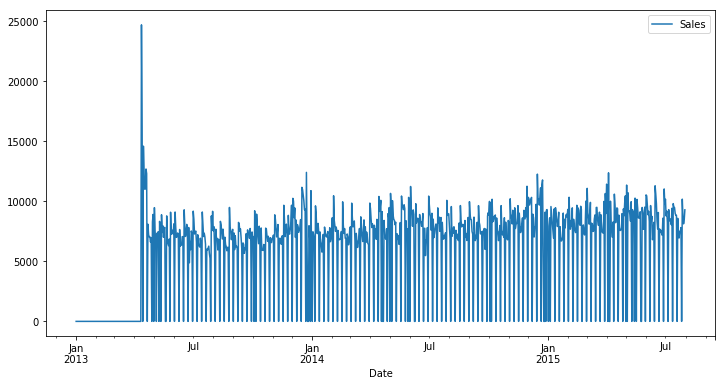

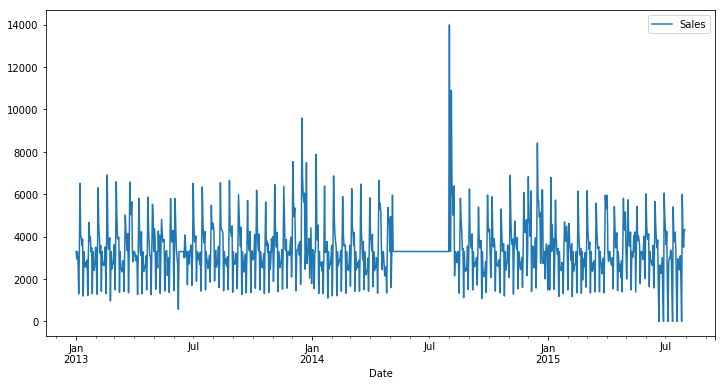

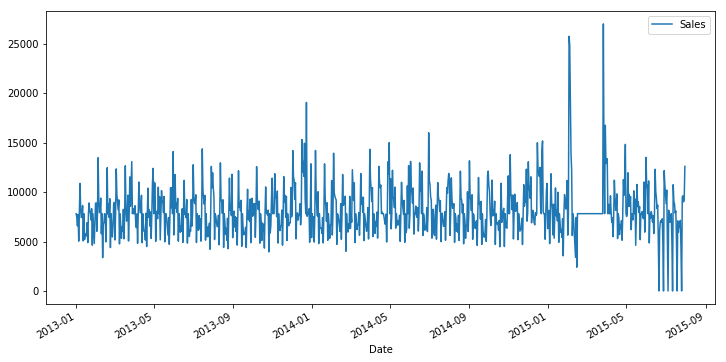

In [16]:
store_103 = train[train['Store'] == 103]
store_103[['Sales']].plot(figsize=(12,6))
store_708 = train[train['Store'] == 708]
store_708[['Sales']].plot(figsize=(12,6))
store_349 = train[train['Store'] == 349]
store_349[['Sales']].plot(figsize=(12,6))
store_972 = df[df['Store'] == 972]
store_972[['Sales']].plot(figsize=(12,6))
store_674 = df[df['Store'] == 674]
store_674[['Sales']].plot(figsize=(12,6))
plt.show()

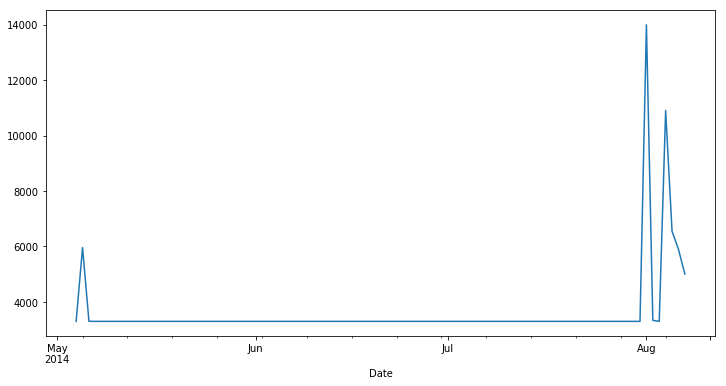

In [17]:
store_972[(store_972.index > '2014-05-03') & (store_972.index < '2014-08-08')]['Sales'].sort_index().plot(figsize=(12,6))

In [18]:
store = pd.read_csv('../data/store.csv', low_memory=False)

In [19]:
store[store['Store'] == 708]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
707,708,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"


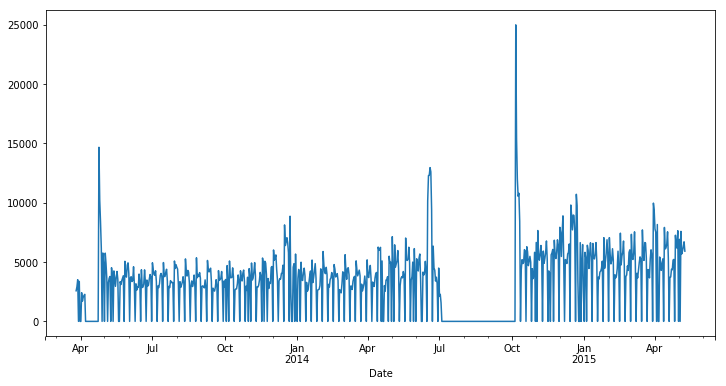

In [20]:
store_708[(store_708.index > '2013-03-25') & (store_708.index < '2015-05-10')]['Sales'].plot(figsize=(12,6))

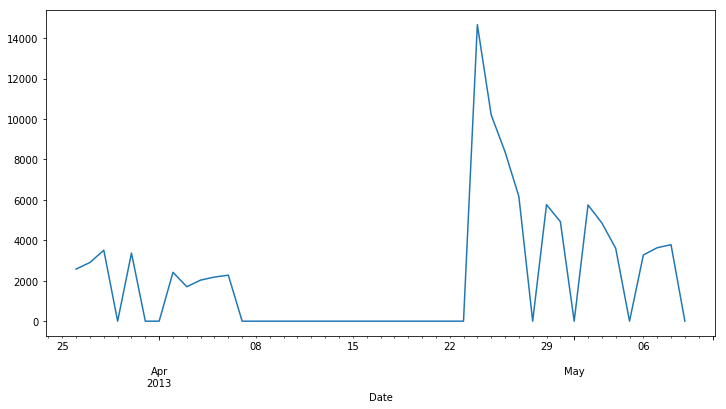

In [21]:
store_708[(store_708.index > '2013-03-25') & (store_708.index < '2013-05-10')]['Sales'].plot(figsize=(12,6))

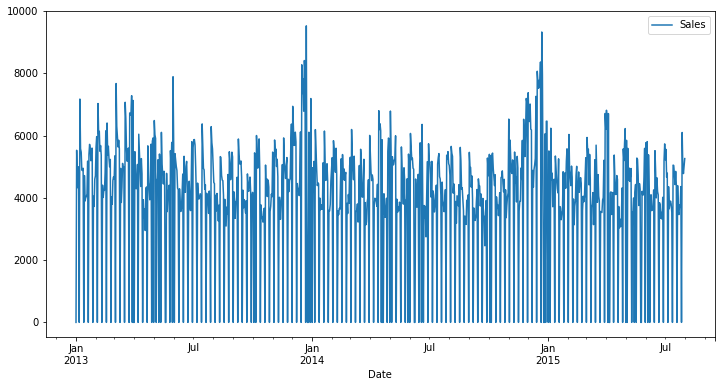

In [22]:
store_1 = train[train['Store'] == 1]
store_1[['Sales']].plot(figsize=(12,6))

In [23]:
store[store['Store'] == 1]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [24]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [25]:
outliers = pd.read_csv('../data/outliers.csv', low_memory=False, usecols=[1,2,3])

In [26]:
outliers['Count'].sum()

24726

In [27]:
outliers['Column'].unique()

array(['SoonChristmas', 'WasChristmas', 'SoonRefurbishments',
       'WasRefurbishments'], dtype=object)

In [28]:
outliers[outliers['Column'] == 'SalesLog'].tail()

,Store,Column,Count


In [29]:
df[(df['Month'] == 12) & (df['DayOfMonth'].isin([15,16,17,18])) &(df['Store'] == 1)][['Sales','SalesLog']]

,Sales,SalesLog
Date,,
2014-12-18,7785.0,8.960083
2014-12-17,7523.0,8.925853
2014-12-16,7739.0,8.954157
2014-12-15,8069.0,8.995909
2013-12-18,7821.0,8.964696
2013-12-17,7356.0,8.903408
2013-12-16,8277.0,9.021357
2013-12-15,4647.0,8.444192


In [30]:
for dat in df[df['Store'] == 1]['DateInt'].head():
    print(dat)

20150731
20150730
20150729
20150728
20150727
